<a href="https://colab.research.google.com/github/livitskatetyana/EDA-of-Airbnb-Listings/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Data/nyc_2019.csv")

In [20]:
print("Dataset size:", df.shape)
print(df.dtypes)
print(df.isnull().sum())
print(df.describe())

Dataset size: (48895, 16)
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitud

In [21]:
df = df.drop(columns=['number_of_reviews', 'last_review', 'reviews_per_month'])

In [22]:
print("Dataset size:", df.shape)
print(df.dtypes)
print(df.isnull().sum())
print(df.describe())

Dataset size: (48895, 13)
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object
id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
calcula

In [23]:
df = df.dropna(subset=['name', 'host_name'])

In [24]:
print("Dataset size:", df.shape)
print(df.dtypes)
print(df.isnull().sum())
print(df.describe())

Dataset size: (48858, 13)
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object
id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
calculated_host_li

In [25]:
print("Number of full Duplicates:", df.duplicated().sum())
df = df.drop_duplicates()
print("Number of id Duplicates:", df.duplicated(subset='id').sum())
df = df.drop_duplicates(subset='id')

Number of full Duplicates: 0
Number of id Duplicates: 0


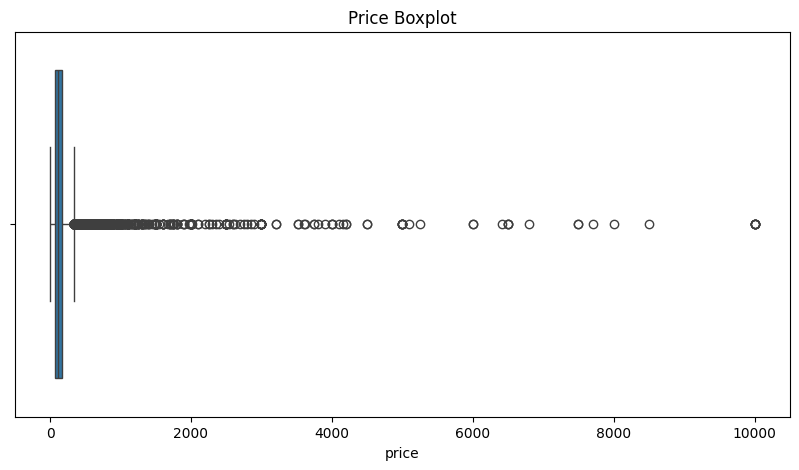

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.boxplot(x=df['price'])
plt.title("Price Boxplot")
plt.show()

df['price_flag'] = df['price'].apply(lambda x: 'anomaly' if x < 10 or x > 1000 else 'ok')

df_clean = df[(df['price_flag'] == 'ok')]


In [28]:
df_clean['minimum_nights_flag'] = df_clean['minimum_nights'].apply(lambda x: 'anomaly' if x < 1 or x > 30 else 'ok')
df_clean = df_clean[df_clean['minimum_nights_flag'] == 'ok']
print("Datasize after cleaning minimum_nights:", df_clean.shape)
df_clean[['minimum_nights', 'minimum_nights_flag']].head()


Datasize after cleaning minimum_nights: (47888, 15)


,minimum_nights,minimum_nights_flag
0,1,ok
1,1,ok
2,3,ok
3,1,ok
4,10,ok


In [30]:
print("Datasize clean:", df_clean.shape)
print(df_clean.dtypes)
print(df_clean.isnull().sum())
print(df_clean.describe())


Datasize clean: (47888, 15)
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
calculated_host_listings_count      int64
availability_365                    int64
price_flag                         object
minimum_nights_flag                object
dtype: object
id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
pric

In [32]:
categorical_cols = ['neighbourhood_group', 'neighbourhood', 'room_type', 'host_name']
for col in categorical_cols:
  print(f"\nUnique values in columns '{col}': {df_clean[col].nunique()}")


Unique values in columns 'neighbourhood_group': 5

Unique values in columns 'neighbourhood': 221

Unique values in columns 'room_type': 3

Unique values in columns 'host_name': 11302


In [33]:
df_clean.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,price_flag,minimum_nights_flag
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,6,365,ok,ok
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,2,355,ok,ok
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,1,365,ok,ok
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,1,194,ok,ok
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,1,0,ok,ok
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,1,129,ok,ok
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,1,220,ok,ok
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,1,0,ok,ok
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,4,188,ok,ok
10,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,1,6,ok,ok


In [34]:
df_clean['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

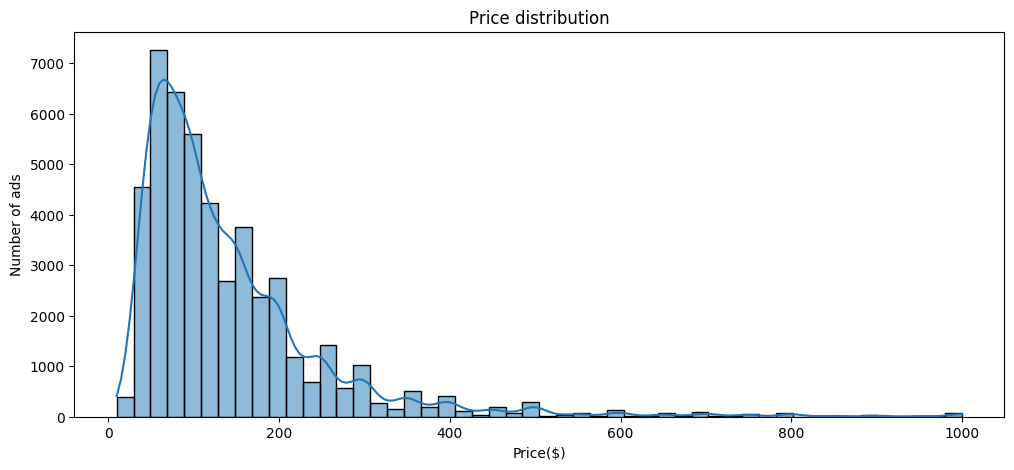

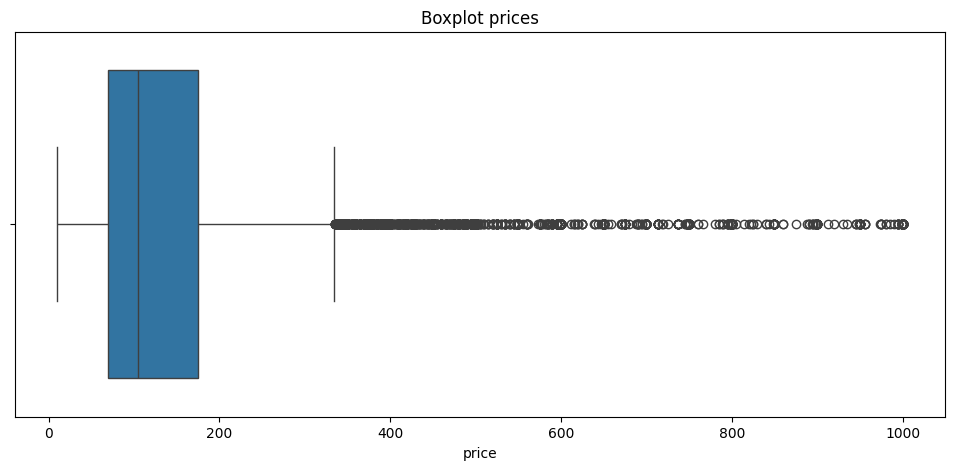

In [36]:
plt.figure(figsize=(12,5))
sns.histplot(df_clean["price"], bins=50, kde=True)
plt.title("Price distribution")
plt.xlabel("Price($)")
plt.ylabel("Number of ads")
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(x=df_clean['price'])
plt.title("Boxplot prices")
plt.show()

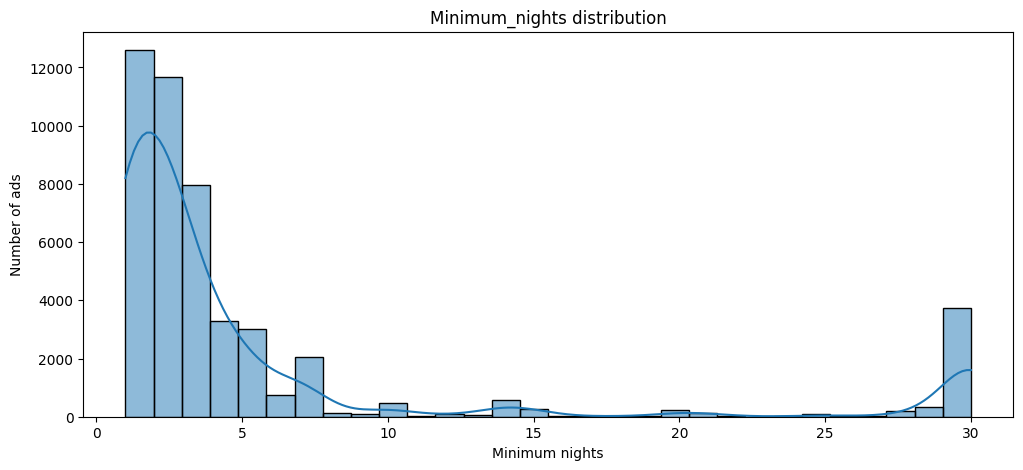

In [37]:
plt.figure(figsize=(12,5))
sns.histplot(df_clean['minimum_nights'], bins=30, kde=True)
plt.title("Minimum_nights distribution")
plt.xlabel("Minimum nights")
plt.ylabel("Number of ads")
plt.show()

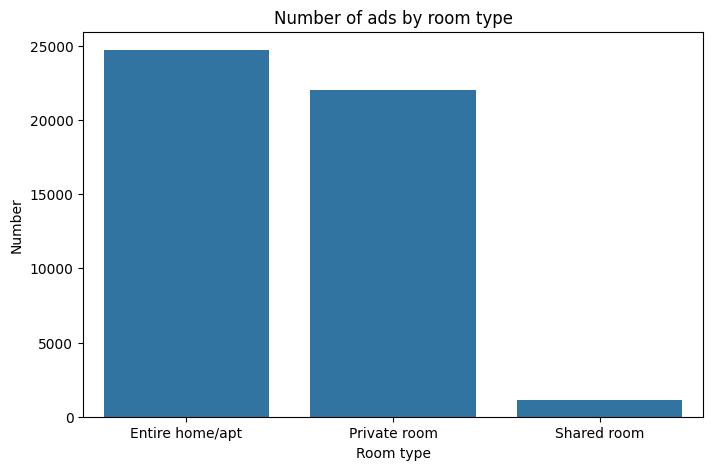

In [38]:
plt.figure(figsize=(8,5))
sns.countplot(data=df_clean, x='room_type', order=df_clean['room_type'].value_counts().index)
plt.title("Number of ads by room type")
plt.xlabel("Room type")
plt.ylabel("Number")
plt.show()

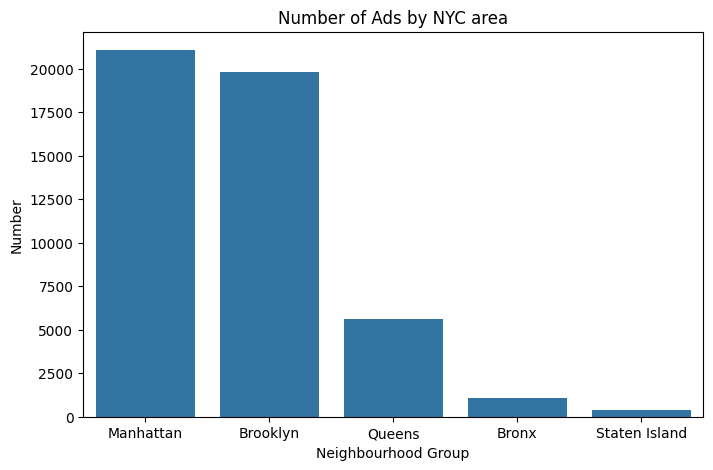

In [40]:
plt.figure(figsize=(8,5))
sns.countplot(data=df_clean, x='neighbourhood_group', order=df_clean['neighbourhood_group'].value_counts().index)
plt.title("Number of Ads by NYC area")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Number")
plt.show()

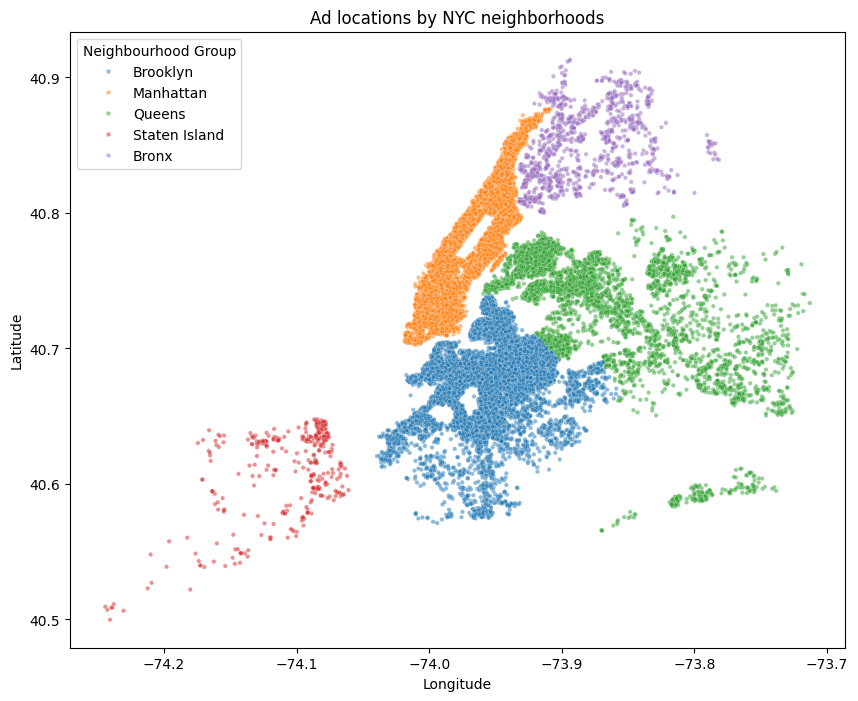

In [42]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df_clean, x='longitude', y='latitude', hue='neighbourhood_group', alpha=0.5, s=10)
plt.title("Ad locations by NYC neighborhoods")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title='Neighbourhood Group')
plt.show()

In [44]:
numeric_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns
print("Numeric columns:", numeric_cols)

numeric_stats = df_clean[numeric_cols].agg(['mean', 'median', 'std']).T
numeric_stats = numeric_stats.rename(columns={'std':'std_dev'})
print("\nMain statistical indicators of numerical variables:")
print(numeric_stats)

Numeric columns: Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

Main statistical indicators of numerical variables:
                                        mean        median       std_dev
id                              1.903967e+07  1.970144e+07  1.096913e+07
host_id                         6.780237e+07  3.103240e+07  7.867171e+07
latitude                        4.072882e+01  4.072286e+01  5.458839e-02
longitude                      -7.395188e+01 -7.395552e+01  4.630430e-02
price                           1.413314e+02  1.050000e+02  1.168904e+02
minimum_nights                  5.577786e+00  2.000000e+00  8.197262e+00
calculated_host_listings_count  7.169437e+00  1.000000e+00  3.313782e+01
availability_365                1.114588e+02  4.300000e+01  1.310571e+02


In [45]:
categorical_cols = df_clean.select_dtypes(include=['object']).columns
print("\nCategorical columns:", categorical_cols)

for col in categorical_cols:
  print(f"\nColumn '{col}':")
  print("Unique values:", df_clean[col].nunique())
  print("Top-10 most common meanings:")
  print(df_clean[col].value_counts().head(10))



Categorical columns: Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'price_flag', 'minimum_nights_flag'],
      dtype='object')

Column 'name':
Unique values: 46928
Top-10 most common meanings:
name
Hillside Hotel                                18
Home away from home                           17
New york Multi-unit building                  15
Brooklyn Apartment                            12
Loft Suite @ The Box House Hotel              11
Private Room                                  11
Artsy Private BR in Fort Greene Cumberland    10
Private room                                  10
Cozy Brooklyn Apartment                        8
Private room in Williamsburg                   8
Name: count, dtype: int64

Column 'host_name':
Unique values: 11302
Top-10 most common meanings:
host_name
Michael         392
David           392
Sonder (NYC)    327
John            291
Alex            277
Sarah           224
Blueground      224
Daniel          223
Ma

In [46]:
import numpy as np
df_clean['log_price'] = np.log1p(df_clean['price'])

In [47]:
numeric_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns
print("Numeric columns:", numeric_cols)

numeric_stats = df_clean[numeric_cols].agg(['mean', 'median', 'std']).T
numeric_stats = numeric_stats.rename(columns={'std':'std_dev'})
print("\nMain statistical indicators of numerical variables:")
print(numeric_stats)

Numeric columns: Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'calculated_host_listings_count', 'availability_365', 'log_price'],
      dtype='object')

Main statistical indicators of numerical variables:
                                        mean        median       std_dev
id                              1.903967e+07  1.970144e+07  1.096913e+07
host_id                         6.780237e+07  3.103240e+07  7.867171e+07
latitude                        4.072882e+01  4.072286e+01  5.458839e-02
longitude                      -7.395188e+01 -7.395552e+01  4.630430e-02
price                           1.413314e+02  1.050000e+02  1.168904e+02
minimum_nights                  5.577786e+00  2.000000e+00  8.197262e+00
calculated_host_listings_count  7.169437e+00  1.000000e+00  3.313782e+01
availability_365                1.114588e+02  4.300000e+01  1.310571e+02
log_price                       4.723601e+00  4.663439e+00  6.620248e-01


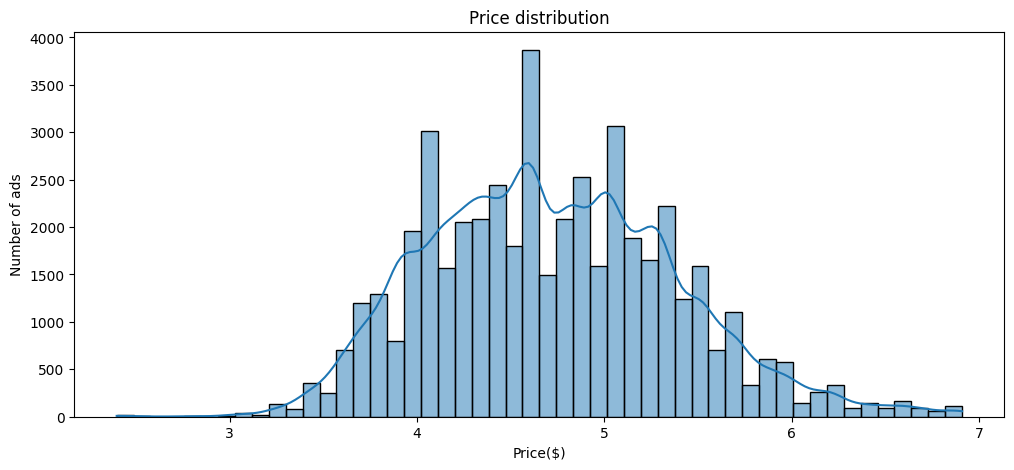

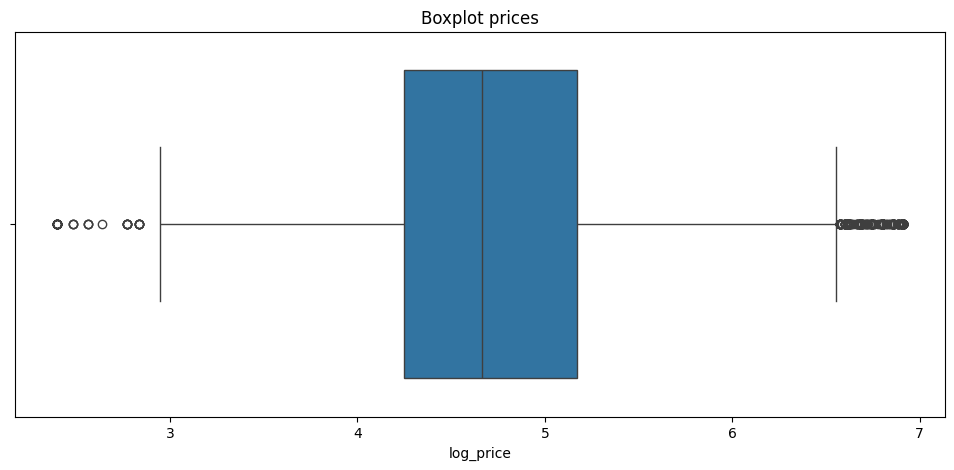

In [48]:
plt.figure(figsize=(12,5))
sns.histplot(df_clean["log_price"], bins=50, kde=True)
plt.title("Price distribution")
plt.xlabel("Price($)")
plt.ylabel("Number of ads")
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(x=df_clean['log_price'])
plt.title("Boxplot prices")
plt.show()

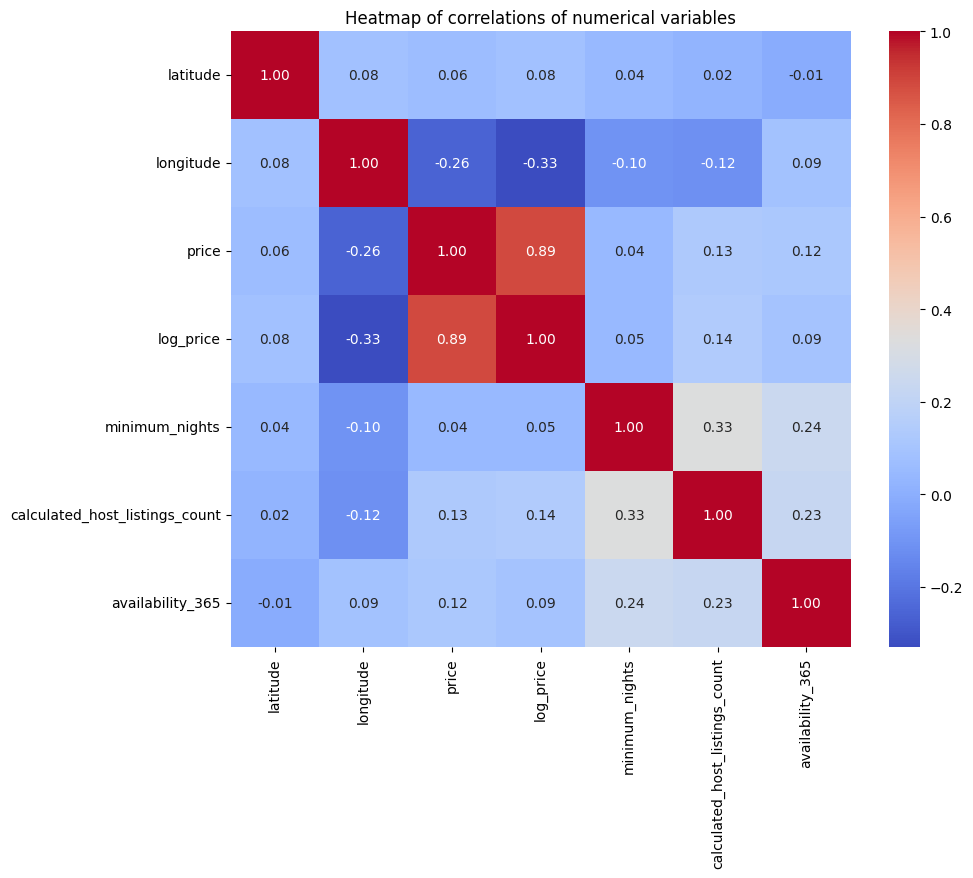

In [49]:
numeric_cols = ['latitude', 'longitude', 'price', 'log_price', 'minimum_nights',
                'calculated_host_listings_count', 'availability_365']
plt.figure(figsize=(10,8))
corr = df_clean[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Heatmap of correlations of numerical variables")
plt.show()

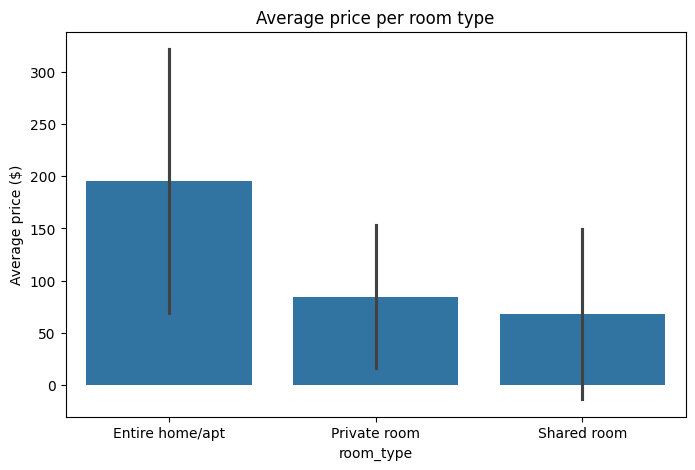

In [52]:
plt.figure(figsize=(8,5))

sns.barplot(
    data=df_clean, x='room_type', y='price', errorbar='sd', order=df_clean['room_type'].value_counts().index)

plt.title("Average price per room type")
plt.ylabel("Average price ($)")
plt.show()

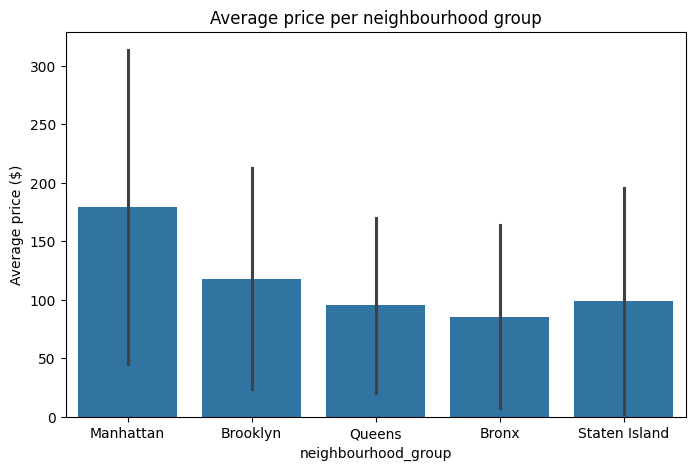

In [54]:
plt.figure(figsize=(8,5))

sns.barplot(data=df_clean, x='neighbourhood_group', y='price', errorbar='sd', order=df_clean['neighbourhood_group'].value_counts().index)

plt.title("Average price per neighbourhood group")
plt.ylabel("Average price ($)")
plt.show()

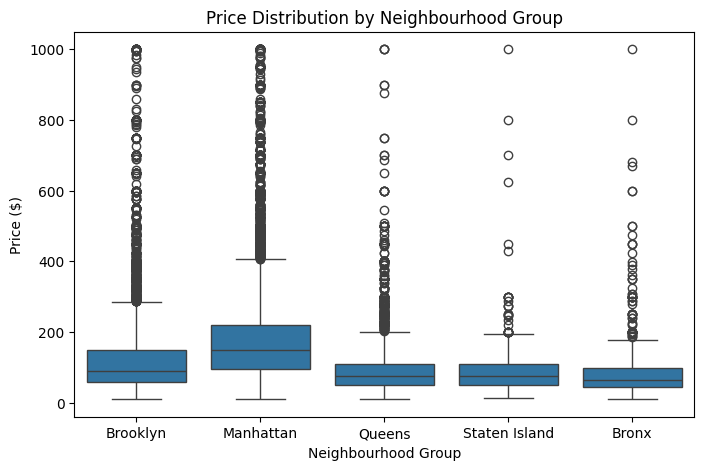

In [55]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_clean, x='neighbourhood_group', y='price')
plt.title("Price Distribution by Neighbourhood Group")
plt.ylabel("Price ($)")
plt.xlabel("Neighbourhood Group")
plt.show()

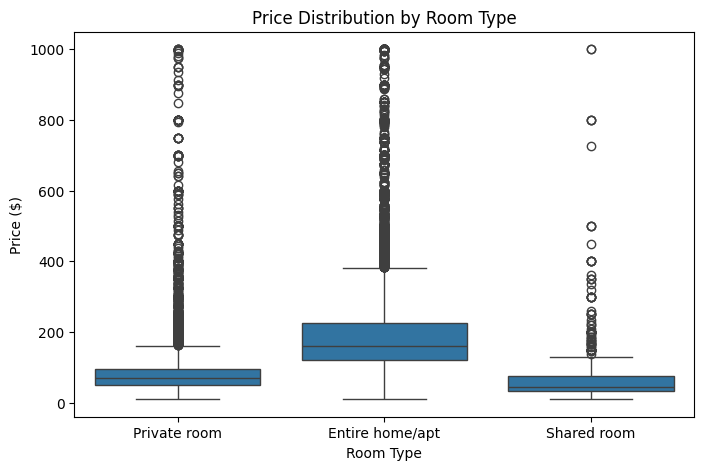

In [56]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_clean, x='room_type', y='price')
plt.title("Price Distribution by Room Type")
plt.ylabel("Price ($)")
plt.xlabel("Room Type")
plt.show()

In [60]:
df_corr = df_clean.copy()
df_corr = pd.get_dummies(df_corr, columns=['room_type'], drop_first=True)

df_corr = pd.get_dummies(df_corr, columns=['neighbourhood_group'], drop_first=True)
numeric_cols = ['latitude', 'longitude', 'price', 'log_price', 'minimum_nights',
                'calculated_host_listings_count', 'availability_365']

dummy_cols = [col for col in df_corr.columns if 'room_type_' in col or 'neighbourhood_group_' in col]

corr_cols = numeric_cols + dummy_cols




In [61]:
corr_matrix = df_corr[corr_cols].corr()

corr_matrix_rounded = corr_matrix.round(2)
corr_matrix_rounded

,latitude,longitude,price,log_price,minimum_nights,calculated_host_listings_count,availability_365,room_type_Private room,room_type_Shared room,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
latitude,1.00,0.08,0.06,0.08,0.04,0.02,-0.01,0.01,0.00,-0.67,0.59,0.02,-0.19
longitude,0.08,1.00,-0.26,-0.33,-0.10,-0.12,0.09,0.18,0.03,0.01,-0.43,0.62,-0.29
price,0.06,-0.26,1.00,0.89,0.04,0.13,0.12,-0.45,-0.10,-0.17,0.29,-0.14,-0.03
log_price,0.08,-0.33,0.89,1.00,0.05,0.14,0.09,-0.58,-0.18,-0.19,0.35,-0.19,-0.05
minimum_nights,0.04,-0.10,0.04,0.05,1.00,0.33,0.24,-0.13,-0.02,-0.07,0.12,-0.05,-0.02
calculated_host_listings_count,0.02,-0.12,0.13,0.14,0.33,1.00,0.23,-0.11,-0.01,-0.12,0.15,-0.03,-0.01
availability_365,-0.01,0.09,0.12,0.09,0.24,0.23,1.00,-0.01,0.06,-0.08,-0.01,0.09,0.06
room_type_Private room,0.01,0.18,-0.45,-0.58,-0.13,-0.11,-0.01,1.00,-0.14,0.08,-0.15,0.10,0.01
room_type_Shared room,0.00,0.03,-0.10,-0.18,-0.02,-0.01,0.06,-0.14,1.00,-0.02,-0.01,0.03,0.00
neighbourhood_group_Brooklyn,-0.67,0.01,-0.17,-0.19,-0.07,-0.12,-0.08,0.08,-0.02,1.00,-0.74,-0.31,-0.07


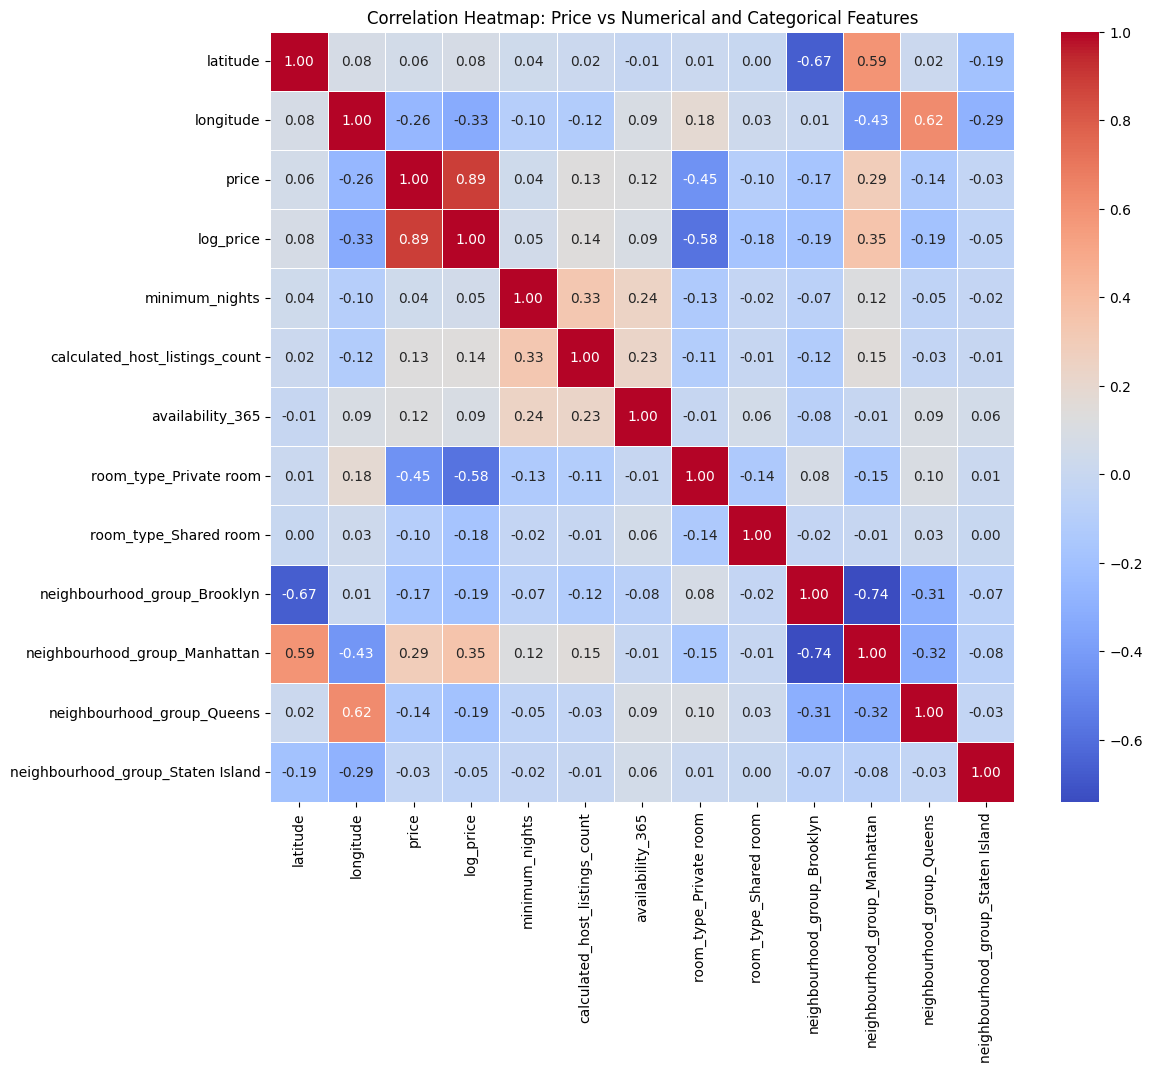

In [62]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix_rounded, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title("Correlation Heatmap: Price vs Numerical and Categorical Features")
plt.show()
